## Movie Review

In [1]:
from load_sentiment import load_sentiment_data
from text_utils import build_dict, generate_sequence
from models import build_lstm, build_cnn, build_cnn_lstm, build_bidirectional_lstm

Using Theano backend.
Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN 5103)


In [2]:
dirpath = "/home/ec2-user/data/rt-polaritydata/"
max_features = 10000

X_train, X_test, Y_train, Y_test, worddict = load_sentiment_data(dirpath, max_tokens=max_features)

Building dictionary.. 201209  total words  20247  unique words
Filtering to 10000  unique words


In [3]:
nb_classes = len(set(Y_train + Y_test))
print('Num. classes:', nb_classes)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

maxlen_train = max([len(x) for x in X_train])
maxlen_test  = max([len(x) for x in X_test])
print('Max length train', maxlen_train)
print('Max length tet', maxlen_test)

('Num. classes:', 2)
(9595, 'train sequences')
(1067, 'test sequences')
('Max length train', 56)
('Max length tet', 59)


In [4]:
maxlen = 60  
batch_size = 32

In [5]:
from keras.preprocessing import sequence

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Pad sequences (samples x time)
('X_train shape:', (9595, 60))
('X_test shape:', (1067, 60))


In [6]:
from keras.utils import np_utils

print('Convert class vector to binary class matrix (for use with categorical_crossentropy)')
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

Convert class vector to binary class matrix (for use with categorical_crossentropy)
('Y_train shape:', (9595, 2))
('Y_test shape:', (1067, 2))


In [22]:
model = build_lstm(max_features, 16, nb_classes)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_4 (Embedding)          (None, None, 16)      160000      embedding_input_4[0][0]          
____________________________________________________________________________________________________
lstm_3 (LSTM)                    (None, 16)            2112        embedding_4[0][0]                
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 2)             34          lstm_3[0][0]                     
____________________________________________________________________________________________________
activation_5 (Activation)        (None, 2)             0           dense_5[0][0]                    
Total params: 162146
______________________________________________________________________

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [24]:
print('Train...')
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          validation_data=(X_test, Y_test))
score, acc = model.evaluate(X_test, Y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 9595 samples, validate on 1067 samples
Epoch 1/10
9595/9595 [==============================] - 53s - loss: 0.6882 - acc: 0.5378 - val_loss: 0.6689 - val_acc: 0.6532
Epoch 2/10
9595/9595 [==============================] - 50s - loss: 0.5724 - acc: 0.7209 - val_loss: 0.5207 - val_acc: 0.7535
Epoch 3/10
9595/9595 [==============================] - 48s - loss: 0.4253 - acc: 0.8100 - val_loss: 0.5040 - val_acc: 0.7582
Epoch 4/10
9595/9595 [==============================] - 46s - loss: 0.3371 - acc: 0.8585 - val_loss: 0.5323 - val_acc: 0.7554
Epoch 5/10
9595/9595 [==============================] - 46s - loss: 0.2918 - acc: 0.8757 - val_loss: 0.5461 - val_acc: 0.7582
Epoch 6/10
9595/9595 [==============================] - 48s - loss: 0.2567 - acc: 0.8960 - val_loss: 0.5626 - val_acc: 0.7573
Epoch 7/10
9595/9595 [==============================] - 50s - loss: 0.2287 - acc: 0.9101 - val_loss: 0.6040 - val_acc: 0.7479
Epoch 8/10
9595/9595 [==============================] - 47s -

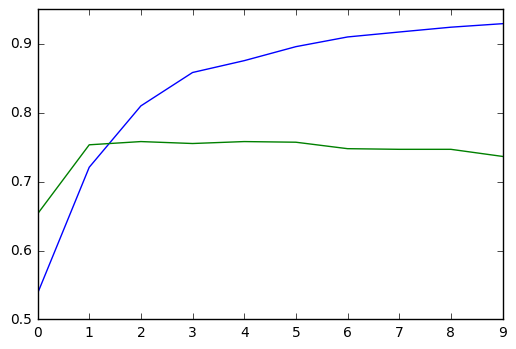

In [25]:
#Plot graphs in the notebook output
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

- Hay claros signos de sobreentrenamiento cuando usamos 64 neuronas intermedias 
- Con 32 neuronas las curvas de aprendizaje tienen mejor pinta, si bien probamos con mas épocas 
- con 16 neuronas no es mucho mejor

## CNN

In [53]:
# set parameters:
embedding_dims = 16 # size of embedding dims
nb_filter = 65      # number of filters 
filter_length = 5    # 1d convolution size
hidden_dims = 50    # size of hidden layers 


print('Build model...')
cnn_model = build_cnn(max_features,embedding_dims, maxlen, nb_filter, filter_length, hidden_dims, nb_classes )

Build model...


In [54]:
cnn_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_10 (Embedding)         (None, 60, 16)        160000      embedding_input_10[0][0]         
____________________________________________________________________________________________________
convolution1d_7 (Convolution1D)  (None, 56, 65)        5265        embedding_10[0][0]               
____________________________________________________________________________________________________
maxpooling1d_7 (MaxPooling1D)    (None, 1, 65)         0           convolution1d_7[0][0]            
____________________________________________________________________________________________________
flatten_7 (Flatten)              (None, 65)            0           maxpooling1d_7[0][0]             
___________________________________________________________________________________________

In [55]:
cnn_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [56]:
nb_epoch = 5

history = cnn_model.fit(X_train, Y_train,
          batch_size=batch_size,
          nb_epoch=nb_epoch,
          validation_data=(X_test, Y_test))

Train on 9595 samples, validate on 1067 samples
Epoch 1/5
9595/9595 [==============================] - 1s - loss: 0.6550 - acc: 0.5898 - val_loss: 0.5553 - val_acc: 0.7329
Epoch 2/5
9595/9595 [==============================] - 1s - loss: 0.4705 - acc: 0.7749 - val_loss: 0.4932 - val_acc: 0.7582
Epoch 3/5
9595/9595 [==============================] - 1s - loss: 0.3457 - acc: 0.8494 - val_loss: 0.4892 - val_acc: 0.7760
Epoch 4/5
9595/9595 [==============================] - 1s - loss: 0.2589 - acc: 0.8946 - val_loss: 0.5283 - val_acc: 0.7610
Epoch 5/5
9595/9595 [==============================] - 1s - loss: 0.2047 - acc: 0.9193 - val_loss: 0.5833 - val_acc: 0.7610


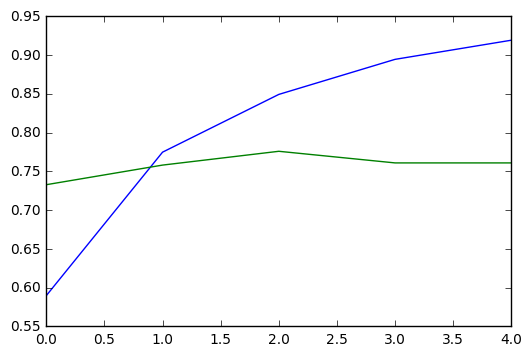

In [57]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

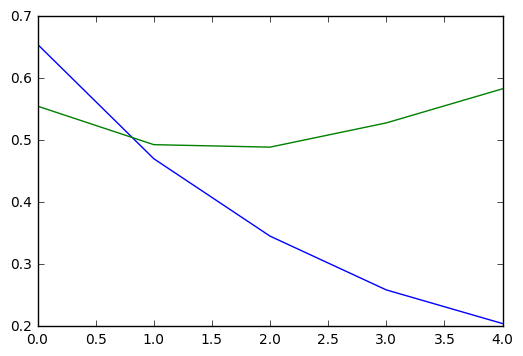

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()